<a href="https://colab.research.google.com/github/jjAguil/Tareas-Simulacion/blob/main/Pandas_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de Pandas y Seaborn
Como ya vimos, `seaborn` es una biblioteca para crear gráficas estadísticas en
Python, y que está escrita sobre `matplotlib`, lo que implica que nos dan la
misma funcionalidad, sin embargo, nos proporciona muchas ventajas y facilidades.

Para usar `seaborn` siempre es recomendable importar también `matplotlib`

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 9)  # size of figures

Una de las principales ventajas que tiene `seaborn` es que tiene una integración
muy buena con los `DataFrame`s de Pandas, por lo que sus funciones pueden
realizar operaciones de agrupamiento, mapeo semántico y agregación estadística
directamente y, así, entregarnos las visualizaciones.

Para ilustrar este caso, utilizaremos un dataset, cuyas
características son bastante buenas para conocer diferentes tipos de
visualizaciones. Tal es el caso del dataset
[Auto-mpg Dataset](https://www.kaggle.com/datasets/uciml/autompg-dataset) que,
a pesar de encontrarse en Kaggle y otros repositorios, puede ser descargado
directamente con `seaborn`.


In [ ]:
cars = sns.load_dataset('mpg')

In [ ]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Podemos observar que seaborn nos descargó un dataframe y, en automático, nos lo
presenta en forma de DataFrame.

In [ ]:
type(cars)

pandas.core.frame.DataFrame

Lo primero que debemos hacer, es una limpieza de nuestros datos, lo que incluye
ver si tenemos algún valor marcado como `NaN` y si tenemos duplicados, en
primera instancia

In [ ]:
cars = cars.dropna()

In [ ]:
cars.duplicated().sum()

0

Toda vez que limpiamos nuestro banco de datos, podemos comenzar a hacer
visualizaciones

# Kernel Density Estimation
Es la aplicación de un *kernel* para estimar la función de densidad de
probabilidad de una distribución de datos. El kernel es una función de densidad
de probabilidad que se posiciona centrada alrededor de cada punto de las
muestras. Posteriormente, se suman las curvas para obtener la estimación final

![](https://drive.google.com/uc?id=1-04XqqRW2ztZUYUY_Z_bR64KzK-gyoTg)

<Axes: xlabel='horsepower', ylabel='Density'>

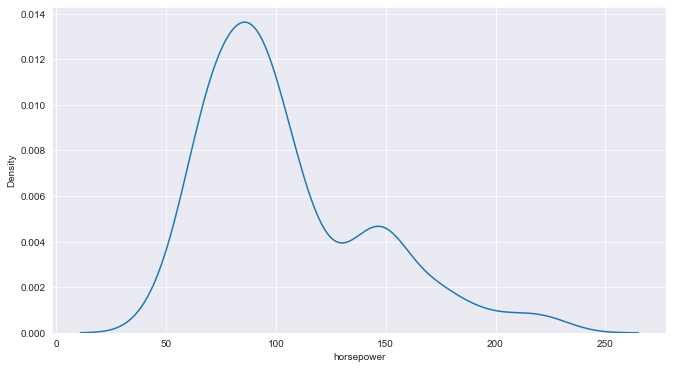

In [ ]:
sns.kdeplot(cars['horsepower'])

Además, podemos *sombrear* la gráfica mediante el parámetro `shade`

<Axes: xlabel='horsepower', ylabel='Density'>

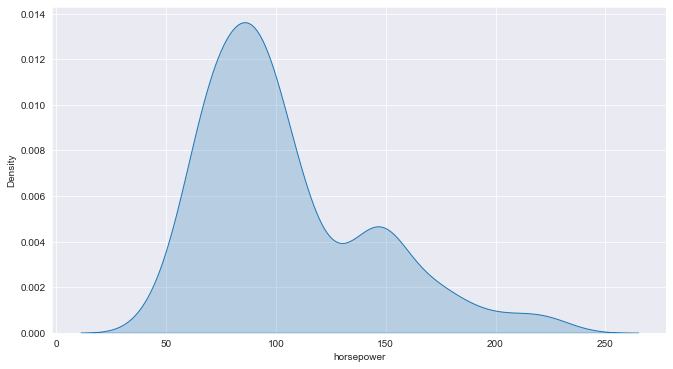

In [ ]:
sns.kdeplot(cars['horsepower'], shade=True)

También podemos crear una gráfica KDE de dos variables, lo cual dará como
resultado una gráfica de contornos, que representan la superficie de la densidad
de probabilidad de las dos vairables.

<Axes: xlabel='horsepower', ylabel='mpg'>

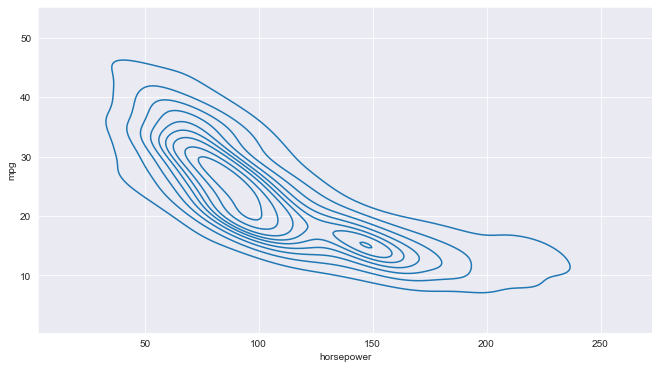

In [ ]:
sns.kdeplot(x=cars['horsepower'], y=cars['mpg'])

Podemos modificar el número de niveles de nuestras curvas, mediante el parámetro
`n_levels`

/Users/cardoso/miniconda3/envs/bci/lib/python3.10/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='horsepower', ylabel='mpg'>

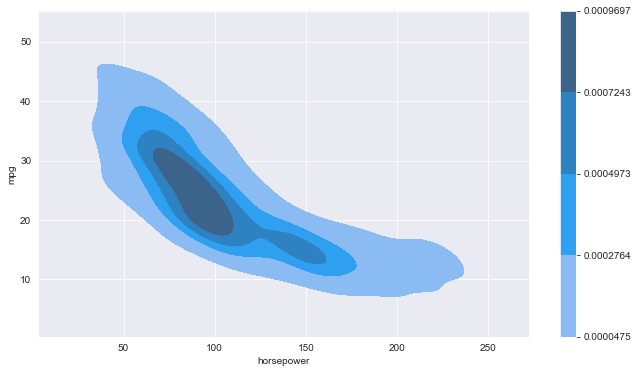

In [ ]:
sns.kdeplot(x=cars['horsepower'], y=cars['mpg'], n_levels=5, shade=True,
            shade_lowest=False, cbar=True)

# Histplot
El método [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html)
nos permite obtener histogramas de una o de dos variables. Recordemos que un
histograma es una herramienta de visualización en la que se cuenta cuántas
observaciones *caen* en un determinado rango de valores.

<Axes: xlabel='mpg', ylabel='Probability'>

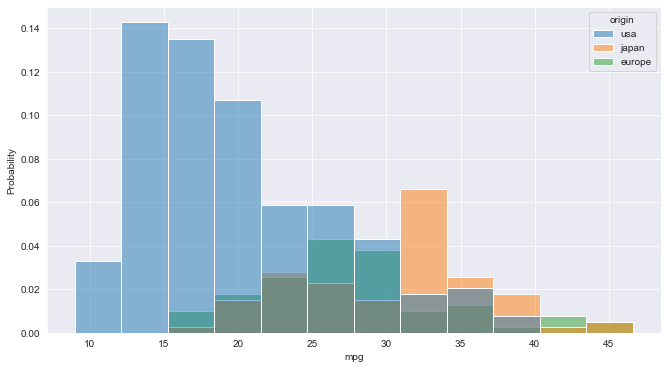

In [ ]:
sns.histplot(x='mpg', data=cars,
            # bins=[10, 20, 30, 40],  # podemos proponer nuestras bins
            # binwidth=15,  # ancho de las bins
            stat='probability',  # count, density (area=1), probability
            # cumulative=True,  # con stat=probability
            hue='origin'  # color a la gráfica en función de otra variable
            )

<Axes: xlabel='mpg', ylabel='cylinders'>

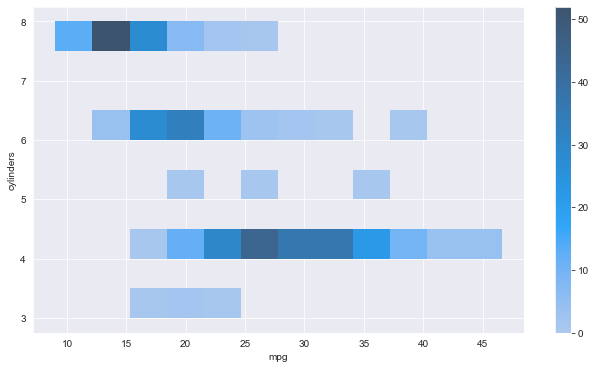

In [ ]:
sns.histplot(x='mpg', y='cylinders', data=cars,
            # bins=[10, 20, 30, 40],  # podemos proponer nuestras bins
            # binwidth=15,  # ancho de las bins
            stat='count',  # count, density (area=1), probability
            # cumulative=True,  # con stat=probability
            cbar=True
            )


In [ ]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

# Boxplot

In [ ]:
cars['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

/Users/cardoso/miniconda3/envs/bci/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='mpg'>

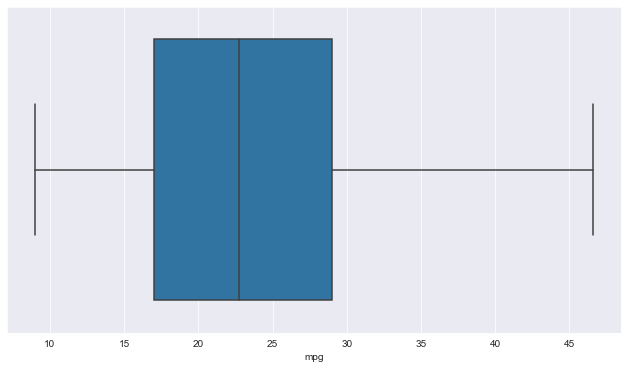

In [ ]:
sns.boxplot(cars['mpg'])

<Axes: xlabel='origin', ylabel='mpg'>

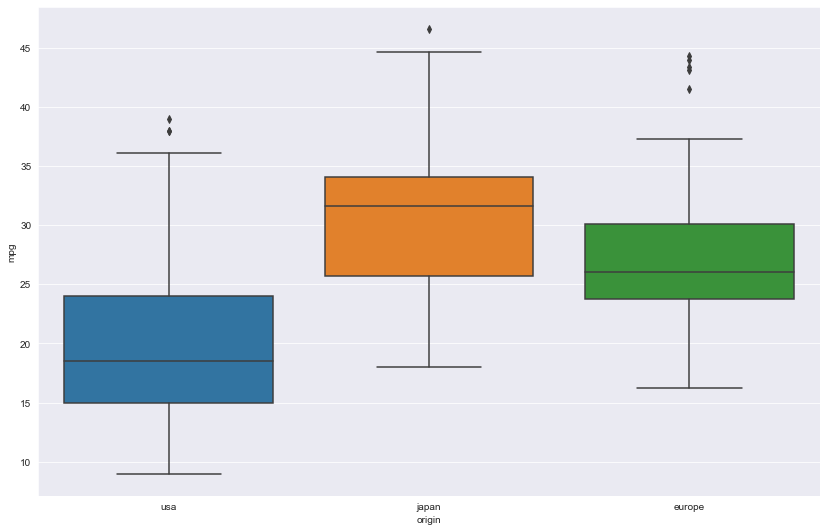

In [ ]:
sns.boxplot(x=cars['origin'], y=cars['mpg'])

<Axes: xlabel='origin', ylabel='mpg'>

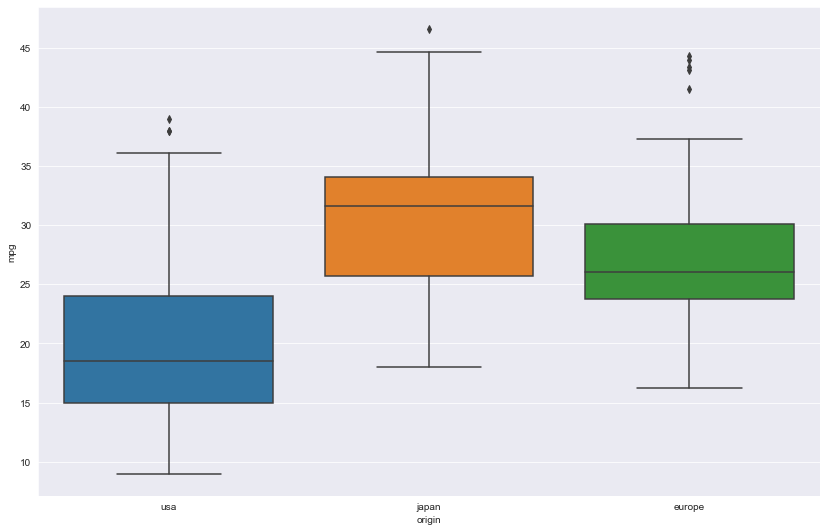

In [ ]:
sns.boxplot(x='origin', y='mpg', data=cars)

<Axes: xlabel='origin', ylabel='mpg'>

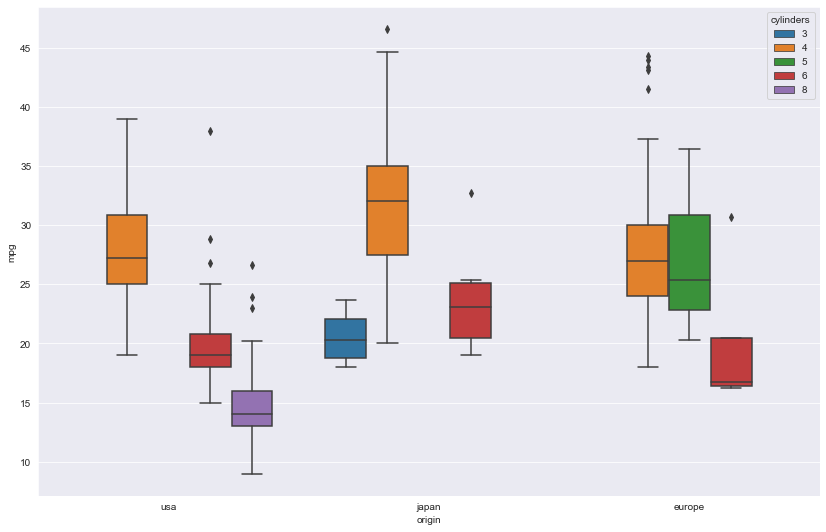

In [ ]:
sns.boxplot(x='origin', y='mpg', hue='cylinders', data=cars)

De las últimas dos gráficas, podemos observar que al parecer, EU produce los
carros menos eficientes, basándonos en la métrica de galones por litro.
Sin embargo, al separar las distribuciones por origen y, además, por número de
cilindros, observamos que esa la razón de ellos es debido a sus carros de 6
cilindros, además de ser el único país que produce coches de 8 cilindros en este
banco de datos.

Hasta ahora hemos trabajado con los datos tal cual los descargamos, sin embargo
podemos crear nuestras propias columnas. Fijemonos primero en la variable
`model_year`

In [ ]:
cars['model_year'].value_counts(ascending=True)

74    26
71    27
80    27
72    28
77    28
81    28
70    29
79    29
75    30
82    30
76    34
78    36
73    40
Name: model_year, dtype: int64

Podemos crear entonces una nueva columna donde tendremos dos categorías:
- coches viejos (del 70 al 75)
- coches no tan viejos (del 76 al 80)

In [ ]:
mask_viejos = cars['model_year'] < 76

cars['cat_model'] = mask_viejos
cars.loc[mask_viejos, 'cat_model'] = 'viejos'
cars.loc[~mask_viejos, 'cat_model'] = 'no tan viejos'

<Axes: xlabel='origin', ylabel='mpg'>

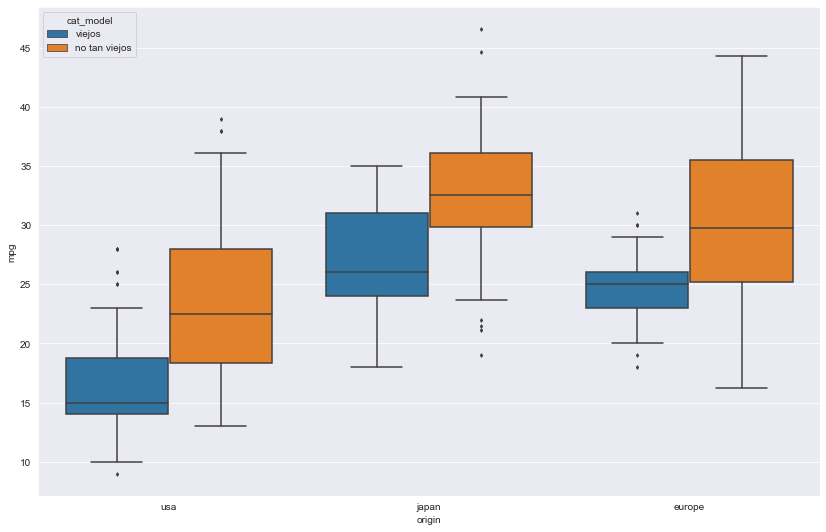

In [ ]:
sns.boxplot(x='origin', y='mpg', hue='cat_model', data=cars,
            # order=['japan', 'europe', 'usa'],
            # hue_order=['no tan viejos', 'viejos'],
            # color='g',  # se usa con hue
            whis=1,  # IQR * whis para longitud de bigotes
            fliersize=2.5,  # tamano de outliers, default=5
            )

Podemos observar como entre más nuevos son los carros, mayor eficiencia en el
consumo de gasolina.

In [ ]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

# Gráfica de Violin
Se forma por una gráfica de caja (Boxplot) y una gráfica KDE.

<Axes: xlabel='cylinders', ylabel='displacement'>

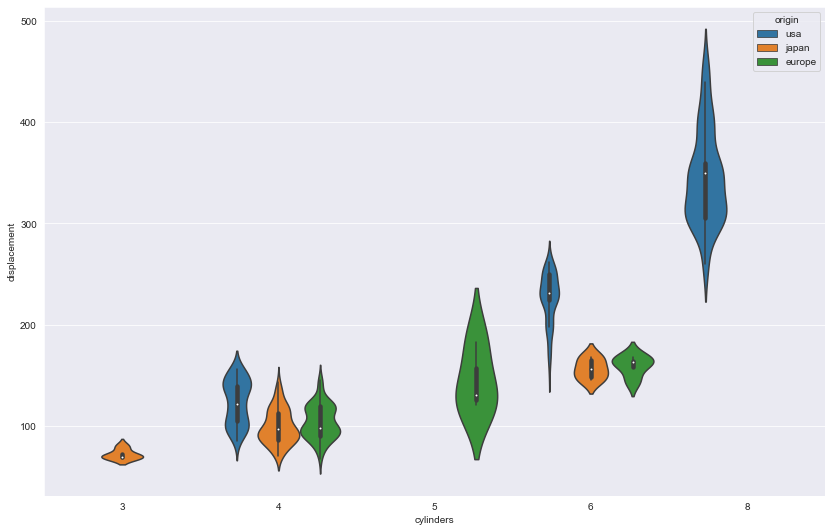

In [ ]:
sns.violinplot(x='cylinders', y='displacement',
               data=cars,
               hue='origin',
               )

La gráfica de violín por default muestra un violín simétrico. Podemos mejorar
la comparación de nuestros datos rompiendo esa simetría, mediante el parámetro
`split`. Sin embargo, esto solo aplica cuando tenemos dos categorías para `hue`.
Creemos entonces un dataframe nuevo, con solo dos valores para la variable
`origin`.

In [ ]:
cars_ = cars[cars['origin'].isin(['japan', 'europe'])]
cars_.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cat_model
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii,viejos
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510,viejos
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,viejos
20,25.0,4,110.0,87.0,2672,17.5,70,europe,peugeot 504,viejos
21,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls,viejos


<Axes: xlabel='cylinders', ylabel='displacement'>

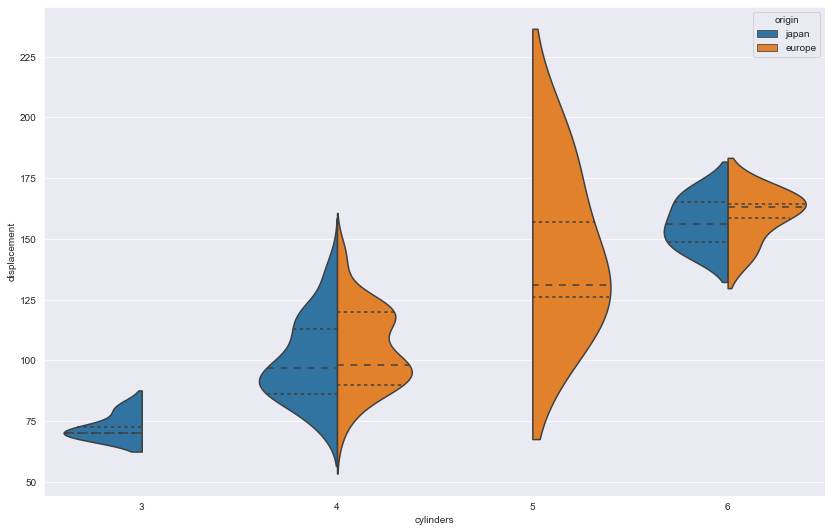

In [ ]:
sns.violinplot(x='cylinders', y='displacement', hue='origin', data=cars_,
               split=True,
               inner='quartiles',
               )

# Swarmplot
Las gráficas de enjambre se crean de la siguiente manera:
- se ordenan los valores de nuestros datos de manera ascendente
- para cada valor que encontramos, poisicionamos en la gráfica con un punto el
número de observaciones con dicho valor


<Axes: xlabel='horsepower'>

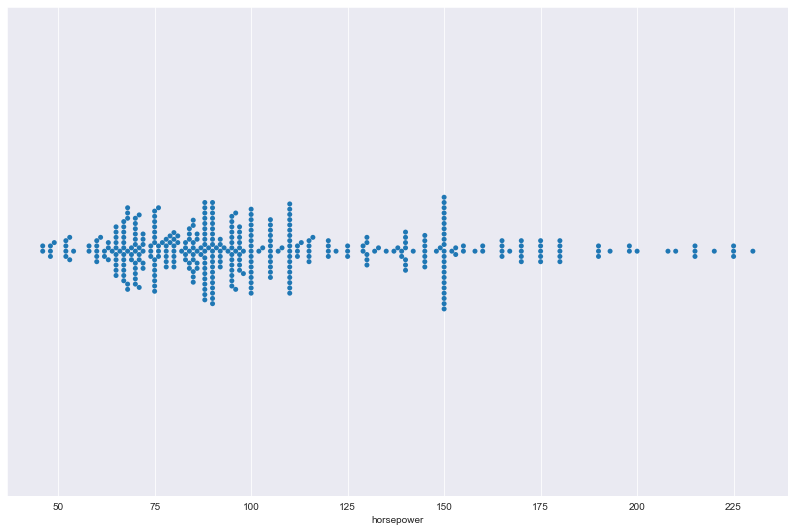

In [ ]:
sns.swarmplot(x=cars['horsepower'])

/Users/cardoso/miniconda3/envs/bci/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='origin', ylabel='horsepower'>

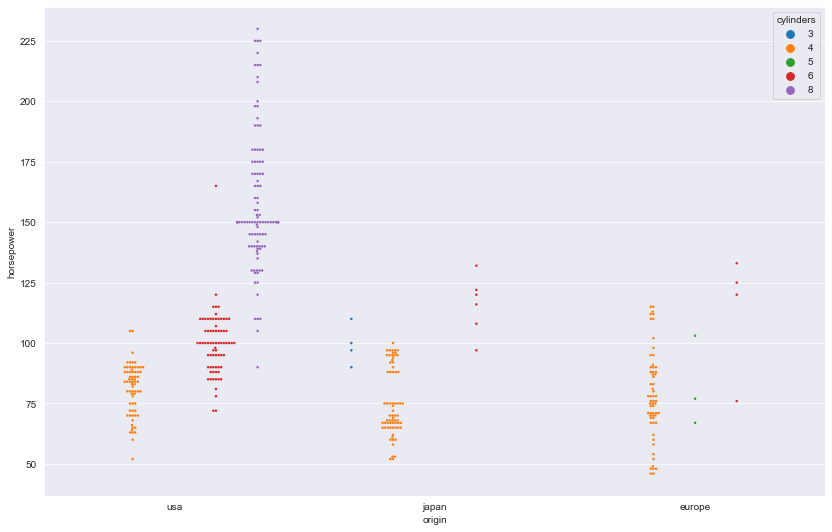

In [ ]:
sns.swarmplot(x='origin', y='horsepower', data=cars,
              hue='cylinders',
              dodge=True,
              size=2.5)

Podemos *encimar* diferentes gráficas al crearlas en la misma celda, por ejemplo:
una gráfica de enjambre y una de caja

In [ ]:
cars_usa = cars[cars['origin'] == 'usa']

<Axes: xlabel='cylinders', ylabel='horsepower'>

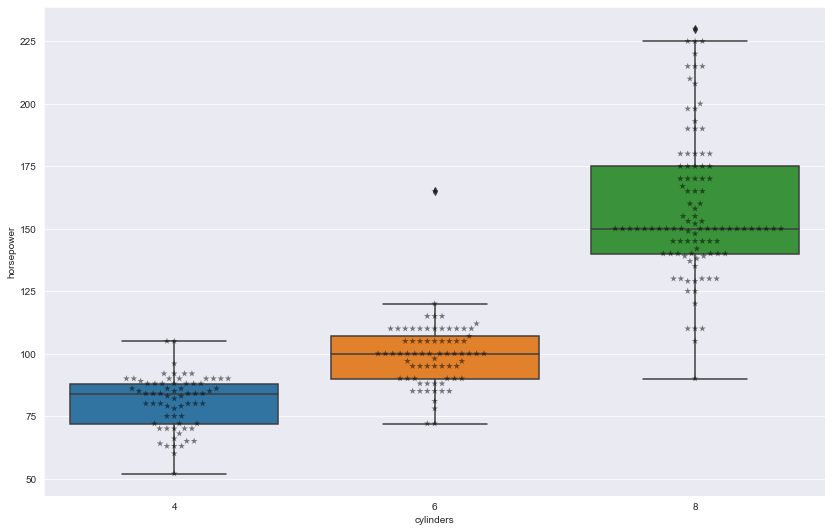

In [ ]:
sns.boxplot(x='cylinders', y='horsepower', data=cars_usa,
            )
sns.swarmplot(x='cylinders', y='horsepower', data=cars_usa,
              color='k',
              alpha=0.5,
              marker='*',
              size=7
            )

In [ ]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'cat_model'],
      dtype='object')

# Scatter plot
Muestra la relación entre dos variables

<Axes: xlabel='weight', ylabel='horsepower'>

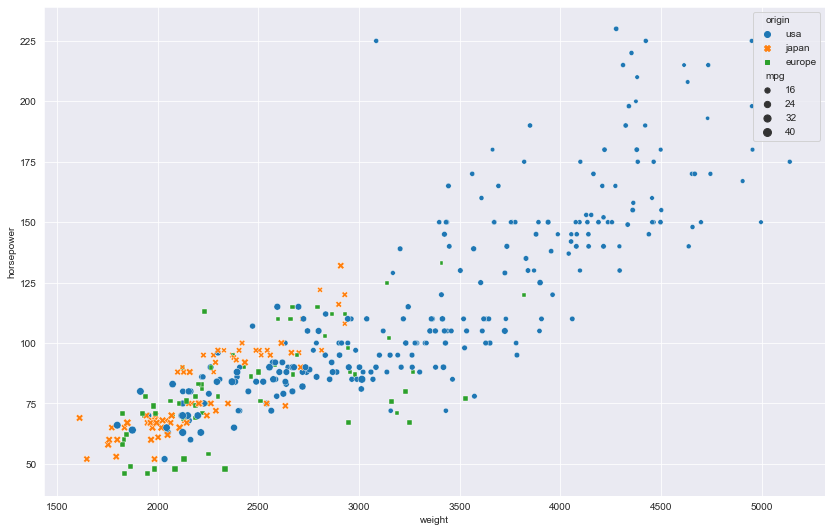

In [ ]:
sns.scatterplot(x='weight', y='horsepower', data=cars,
                hue='origin',
                size='mpg',
                style='origin'
                )

# Regplot
Nos muestra el resultado de modelar una regresión lineal con base en nuestros
datos.

<Axes: xlabel='weight', ylabel='horsepower'>

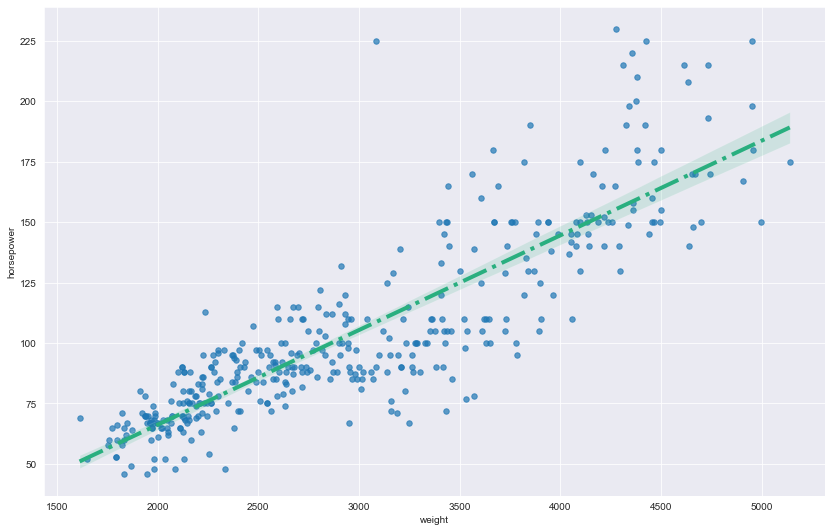

In [ ]:
sns.regplot(x='weight', y='horsepower', data=cars,
            # fit_reg=False,
            # scatter=False,
            # ci=None,
            # order=2,
            # marker='d',
            scatter_kws={'s': 30, 'alpha': 0.7},
            line_kws={'lw': 4, 'color': '#29af7f', 'linestyle': '-.'}
            )


# Heatmap

In [ ]:
cars.groupby('origin')['cylinders'].value_counts().unstack()

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,61.0,3.0,4.0,NaN
japan,4.0,69.0,NaN,6.0,NaN
usa,NaN,69.0,NaN,73.0,103.0


In [ ]:
origin_cyl = (cars.groupby('origin')['cylinders'].value_counts().unstack().fillna(0))

<Axes: xlabel='cylinders', ylabel='origin'>

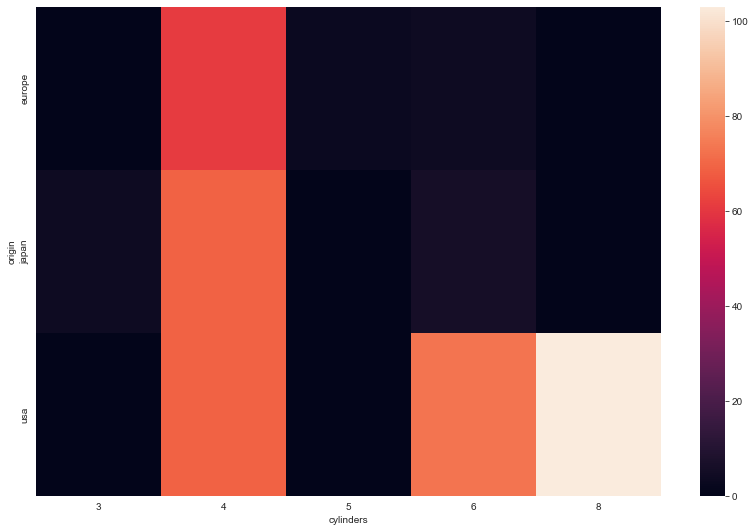

In [ ]:
sns.heatmap(origin_cyl)

In [ ]:
# correlacion de Pearson
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<Axes: >

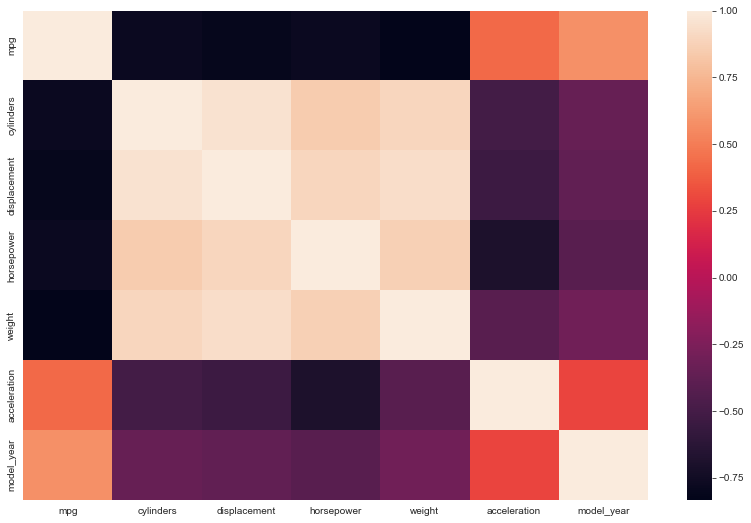

In [ ]:
sns.heatmap(cars.corr())

<Axes: >

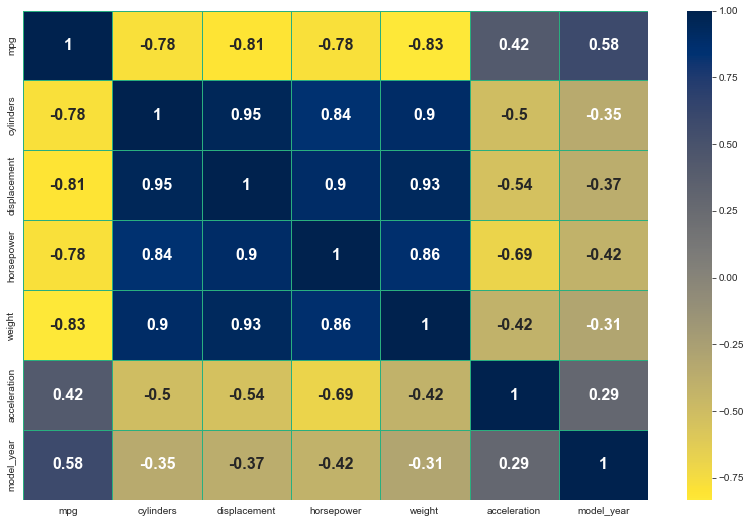

In [ ]:
sns.heatmap(cars.corr(),
            cmap='cividis_r',
            annot=True,
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold'
            },
            linewidth=0.5,
            # linecolor='#29af7f',
            )

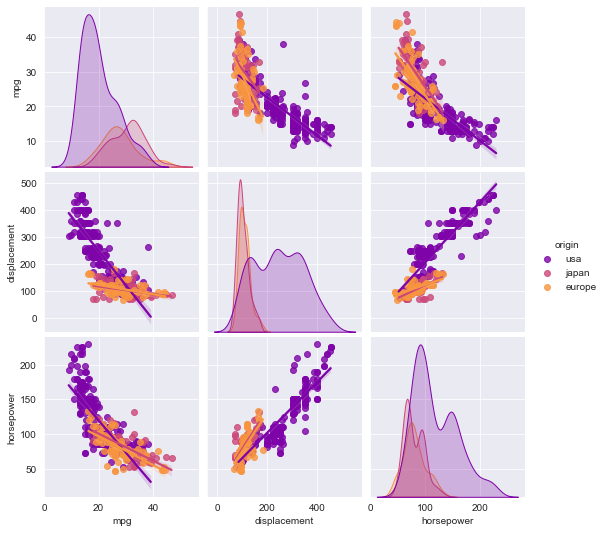

In [ ]:
sns.pairplot(cars,
             hue='origin',
             diag_kind='kde',
             kind='reg',
             vars=['mpg', 'displacement', 'horsepower'],
             palette='plasma')